In [18]:
import pandas
import matplotlib
from pathlib import Path



def mainModeValueCounts(dataFrame, seriesName):
    "This does things"
    counts = dataFrame['mainMode'].value_counts() * 100
    counts.name = seriesName  # rename doesn't seem to work, so just assign things here
    return counts


def getRelative(dataFrame, changedColumns):
    "this also does things"
    result = dataFrame.copy()
    for name in changedColumns:
        result[name] = dataFrame[name] / dataFrame[name].sum()

    return result


def read_csv(listOfCsv):
    "This function reads supplied csvs and aggregates modal shares"
    modalSplits = []
    for file in listOfCsv:
        csv = pandas.read_csv(dataPath + file, usecols=['mainMode'])
        valueCounts = mainModeValueCounts(csv, Path(file).stem)
        modalSplits.append(valueCounts)
    return modalSplits


In [19]:
dataPath = 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\'

expectedModalShare = pandas.read_csv(
    dataPath + 'expected-modal-share.csv', index_col='mode')

modalSplits = read_csv(['baseCase_continued.csv', 'nemo-bikeHighways.csv', 'deurbanisation_02.csv'])
modalSplits.insert(0, expectedModalShare)

modalShare = pandas.concat(modalSplits, axis=1, sort=False).rename(
    columns={'trips': 'expected'})

print(modalShare)


       expected  baseCase_continued  nemo-bikeHighways  deurbanisation_02
pt    1572802.0           1628300.0          1317900.0            1421200
car   5667224.0           5896600.0          5385600.0            4721100
ride  1488973.0           1481100.0          1481100.0            1451500
walk  2909159.0           3607400.0          3287400.0            3567300
bike  1246226.0            960600.0          2102000.0            1899300
drt         NaN                 NaN                NaN             358900


In [20]:
numberOfTrips = modalShare.aggregate(sum)

print('number of trips by scenario')
print(numberOfTrips)

number of trips by scenario
expected              12884384.0
baseCase_continued    13574000.0
nemo-bikeHighways     13574000.0
deurbanisation_02     13419300.0
dtype: float64


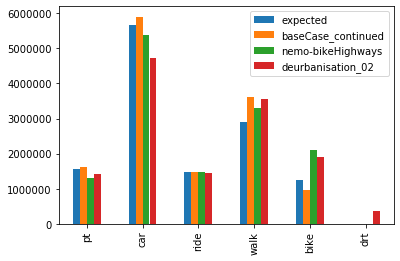

In [21]:
# plot absolute
modalShare.plot.bar()

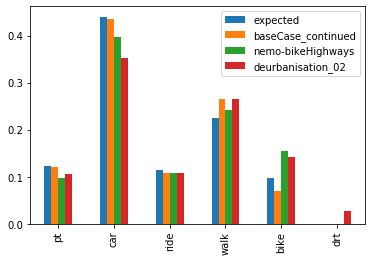

In [22]:
# plot relative
# this should somehow work automagically
relative = getRelative(modalShare, ['expected', 'baseCase_continued', 'nemo-bikeHighways', 'deurbanisation_02'])
relative.plot.bar()

